# Visualizing Chipotle's Data

This time we are going to pull data directly from the internet.
Special thanks to: https://github.com/justmarkham for sharing the dataset and materials.

### Step 1. Import the necessary libraries

In [19]:
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter

# set this so the graphs open internally
%matplotlib inline

### Step 2. Import the dataset from this [address](https://raw.githubusercontent.com/justmarkham/DAT8/master/data/chipotle.tsv). 

### Step 3. Assign it to a variable called chipo.

In [20]:
chipo = pd.read_csv('https://raw.githubusercontent.com/justmarkham/DAT8/master/data/chipotle.tsv', sep='\t')

### Step 4. See the first 10 entries

In [21]:
chipo[:10]

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98
5,3,1,Chicken Bowl,"[Fresh Tomato Salsa (Mild), [Rice, Cheese, Sou...",$10.98
6,3,1,Side of Chips,NaN,$1.69
7,4,1,Steak Burrito,"[Tomatillo Red Chili Salsa, [Fajita Vegetables...",$11.75
8,4,1,Steak Soft Tacos,"[Tomatillo Green Chili Salsa, [Pinto Beans, Ch...",$9.25
9,5,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Pinto...",$9.25


### Step 5. Create a histogram of the top 5 items bought

In [22]:
top_5_items = chipo.groupby('item_name')['quantity'].sum().sort_values(ascending=False)[:5]

Text(0.5, 0, 'Numero de ventas')

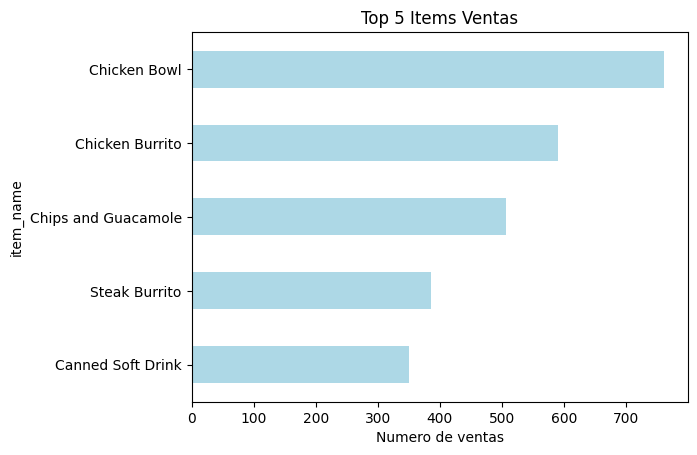

In [23]:
top_5_items.sort_values().plot(kind='barh', color='lightblue', title='Top 5 Items Ventas')
plt.xlabel('Numero de ventas')

### Step 6. Create a scatterplot with the number of items orderered per order price
#### Hint: Price should be in the X-axis and Items ordered in the Y-axis

In [25]:
chipo_2 = chipo.copy()
chipo_2['item_price'] = chipo_2['item_price'].str.replace('$', '').astype(float)
chipo_2.dtypes

C:\Users\alber\AppData\Local\Temp\ipykernel_132780\2503642988.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  chipo_2['item_price'] = chipo_2['item_price'].str.replace('$', '').astype(float)


order_id                int64
quantity                int64
item_name              object
choice_description     object
item_price            float64
dtype: object

In [33]:
item_quant = chipo_2.groupby(['item_price'])['quantity'].sum().reset_index()
item_quant

,item_price,quantity
0,1.09,106
1,1.25,264
2,1.50,117
3,1.69,99
4,1.99,1
...,...,...
73,32.94,3
74,33.75,3
75,35.00,8
76,35.25,3


In [41]:
chipo2_aux = chipo_2[['item_name', 'item_price']].merge(item_quant, on='item_price', how='left').drop_duplicates(subset=['item_name', 'item_price'])
chipo2_aux.sort_values(by='quantity', ascending=False).head(30)

,item_name,item_price,quantity
44,Chicken Salad Bowl,8.75,730
11,Chicken Crispy Tacos,8.75,730
781,Veggie Soft Tacos,8.75,730
63,Chicken Burrito,8.75,730
623,Veggie Burrito,8.75,730
253,Veggie Bowl,8.75,730
19,Chicken Bowl,8.75,730
12,Chicken Soft Tacos,8.75,730
960,Veggie Salad Bowl,8.75,730
62,Veggie Bowl,11.25,521


In [36]:
item_quant.sort_values(by='quantity', ascending=False)

,item_price,quantity
38,8.75,730
47,11.25,521
41,9.25,398
20,4.45,349
35,8.49,311
...,...,...
33,7.98,2
53,12.98,2
57,16.38,2
49,11.49,1


<AxesSubplot: xlabel='item_price', ylabel='quantity'>

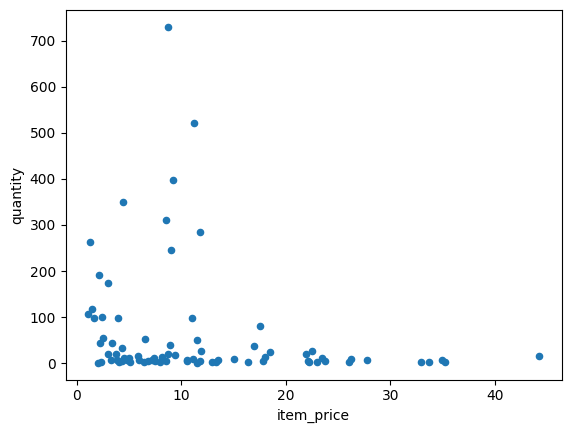

In [34]:
item_quant.plot(kind="scatter", x='item_price', y='quantity')

### Step 7. BONUS: Create a question and a graph to answer your own question.